## Fundamental Concepts of Reinforcement Learning

### University of Virginia
### Reinforcement Learning

#### Last updated: August 21, 2023

---


### SOURCES 

Reinforcement Learning, RS Sutton & AG Barto, 2nd edition. Chapter 1

### LEARNING OUTCOMES

- Understand how reinforcement learning is different from other machine learning problems
- Understand the key elements of RL
- Distinguish between reward and value
- Distinguish between exploration and exploitation, explaining the tradeoff in value discovery
- Understand the difference between behavior policy and target policy

### CONCEPTS

- Reinforcement learning
- agent
- environment
- state
- action
- reward
- exploration vs exploitation
- behavior policy and target policy
- $\epsilon$-greedy strategies

---

### Essential idea of Reinforcement Learning

In this branch of machine learning, an *agent* learns by interacting with its *environment.*  
An agent may be a human, robot, etc.  
The agent has a goal: to maximize a quantitative measure of *reward*.

In many situations, the ground truth is not known:

- a patient is treated for sepsis, a life-threatening emergency. what is the best treatment? 
- an investor must select from a universe of investments, managing portfolio risk and return over time. what is the best policy for dynamic allocation?

In other situations, we may have access to stale ground truths. This is common in dynamic environments:

- trends and levels before versus during a pandemic
- adversarial environments like finance and fraud where agents adapt their behavior
- patient health following injury or illness


Contrast with Supervised Learning (SL) where ground truth is provided up front.

Contrast with Unsupervised Learning (UL) where structure is uncovered from unlabeled data.

---

### Actions Play an Essential Role

Modeling generally involves the state:

- predict if a check is fraudulent
- predict if a stock price will rise
- predict if a patient will be readmitted

An exciting addition in reinforcement learning:

We want to make predictions and control systems **given a state and an action taken**:

- what will happen if an agent takes action $a$ in state $s$?

This is fundamentally different and very exciting!

---

The RL problem is often visualized with this loop, explained below:

<img src="./rl_graphic.png" alt="drawing" width="500"/>

**Agent and Environment**  

The agent might be a person, a robot or other being that registers sensations from the "external surroundings."

Consider tracking a person's pulse. While pulse is generated in the body, it is measured by an external device. Pulse is considered part of the environment.

**State**  

The *state* reflects all relevant information sensed by the agent about its environment.  
In patient health, this might be vital signs and medications.  

The set of all states is called the *state space.*

**Action**

The *actions* represent the controls available to the agent from each state.  
A robot might move one step left, right, forward or backward at each point in time.

The set of all actions is called the *action space.*

**Reward**

The *reward* is essential in defining the problem goal.  
After the agent executes a step, the environment sends the agent a reward, which is a number.  

The reward is short term in nature.  
The reward is a scalar value.  
Selecting actions based on a single reward (greedy actions) may be suboptimal is it may limit future rewards

The agent needs to act strategically to maximize long-term reward.

**Policies**

A *policy* is a function that maps each state to an action. It represents how the agent will behave in each state.  

The policy must cover the entire state space.

The policy might be 
- deterministic (each action produces a single state)
- stochastic (actions produce a distribution of state values). this case is more complex. Example: from state $s_1$, move left with probability 90% and right with probability 10%.

**Value function**

The *value function* represents the long-term value of a state.  
This is quantified as the sum of all expected discounted rewards.

Action choices are made based on value judgements.

**Discounting**

Reflecting time value of money, future rewards are discounted at rate $\gamma$ per time step 

**Model of environment**

Given a state *s* and action *a*, the next state and reward need to be determined.  
In some cases, a model is used to inform the agent of the result from taking action *a* in state *s*.  
The model needs to accurately reflect the environment.

Model-free approaches use trial and error. This works for video games but not healthcare, for example, where caregivers generally can't liberally experiment.

**Exploration vs Exploitation**

The true value of a state needs to be estimated and it follows a distribution. There is generally uncertainty.  
As we take action to visit each state, we approximate the true values.  

We might choose to stick with a state with estimated maximal value, not realizing it to be suboptimal.  
Staying with the state is called *exploitation*. This is the greedy action, as the agent selects the highest short-term reward.  
Acting greedily might limit the possibility for greater long-term gain, so it is important to explore early on.


Trying the other states is called *exploration*.  

There is a **tradeoff between exploitation and exploration:**  
in the short run, exploration might produce lower rewards, but the hope is to learn the true maximal state.

**Behavioral Policy vs Target Policy** 

Related to the concept of exploration vs exploitation are two important policies:

- the *target policy* is the policy that an agent is trying to learn
- the *behavior policy* is the policy being used by an agent 

To more efficiently learn, it can help the agent to follow the behavior policy (this amounts to exploring).

Later we will talk about off-policy methods for learning, which uses the target and behavior policies.

**$\epsilon$-greedy Methods**

A reasonable method for finding more valuable states is to exploit for the majority of the time while exploring a small fraction of the time.

In this strategy, the agent selects action with maximal value (it exploits) with fraction 1-$\epsilon$  
and selects a random action with fraction $\epsilon$ (it explores).



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [22]:
action_values = [1, -1, 0, 2]
epsilon = 0.05

$\epsilon$-greedy selection

In [27]:
def act(epsilon, action_values):
    action_size = len(action_values)
    if np.random.rand() <= epsilon: # random draw with prob epsilon
        return random.randrange(action_size)
    return np.argmax(action_values)  # returns action

Take action following $\epsilon$-greedy strategy

In [28]:
act(epsilon, action_values)

3

Repeat 1000x and produce histogram

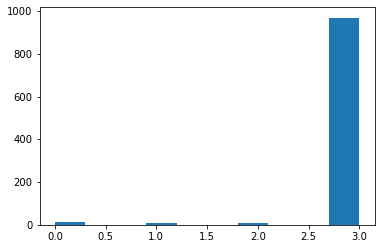

In [29]:
plt.hist([act(epsilon, action_values) for i in range(1000)])
plt.show()

**Exercise 1**  
Given $\epsilon$=0.05, what fraction of the time do we expect to select the highest-valued action?  
This would include selection by both chance and intention.  
Try simulating this and checking if the result matches your intuition.

In [38]:
epsilon = 0.05
# simulate the values
vals = [act(epsilon, action_values) for i in range(100000)]
# compute fraction of actions = 3
len([v for v in vals if v == 3]) / len(vals)

0.96224

Exercise 1 Soln:

by intention: 95%  
by chance:    (1/4) * 5%  
total = 96.25%